In [12]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [13]:
import glob
from ercollect import molecule as mol
from ercollect.molecule import molecule
from ercollect import rxn_syst
from ercollect.rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [ ]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

### collect a random subset of X reactions

In [ ]:
no_ = 300
rs_to_test = []
no_rxns_in_total = len(glob.glob(rs_dir+"*sRS*.gpkl"))
idx = np.random.randint(no_rxns_in_total, size=no_) # + 10000

In [ ]:
generator = rxn_syst.yield_rxn_syst(output_dir=rs_dir)

In [ ]:
smiles_list = []
n_list = []
for i, rs in enumerate(generator):
    if i not in idx:
        continue
    if '-3_' not in rs.pkl:
        continue
    print('index:', i)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
#     try:
#         print('reversible?', rs.reversible)
#     except AttributeError:
#         print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
        try:
            print(rs.skip_reason)
        except AttributeError:
            pass
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
                print('CHEBI ID:', m.chebiID)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
                print('RDKIT logP:', m.logP)
                print('RDKIT Synthetic accessibility:', m.Synth_score)   
                print('size:', m.mid_diam, 'angstrom')
        print('----------------------------------------------')
        print('change in complexity:', rs.delta_comp)
        print('change in synthetic accessibility:', rs.delta_sa)
        # check sequence properties
        print('----------------------------------------------')
        try:
            if rs.sequence is not None:
                print(rs.sequence)
                try:
                    print('uniprotID:', rs.UniprotID)
                except AttributeError:
                    pass
                print('add other sequence IDs for other DBs')
                print('sequence length:', len(rs.sequence))
                print('pI:', rs.pI)
                print('GRAVY:', rs.GRAVY)
                print('A index:', rs.A_index)
                print('I index:', rs.I_index)
                print('TM index:', rs.TM_index)
        except AttributeError:
            pass
    input('done?')
    clear_output()

In [ ]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)


## Visualize a specific reaction system
- includes search functions

In [58]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw, Descriptors

In [17]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [18]:
# get a list of RS with max_comp_size < XX and sequence != None
XX = 6.5
for rs in yield_rxn_syst(output_dir=directory):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size < XX:
        try:
            if rs.sequence is not None:
                print(rs.pkl, rs.TM_index, rs.A_index)
        except AttributeError:
            pass

error loading (the exception needs to be determined):
/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/sRS-1_14_13_58-KEGG-R02449.gpkl


SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [45]:
pkl_name = 'sRS-5_2_1_1-KEGG-R01087.gpkl'

In [46]:
rs = get_RS(directory+pkl_name, output_dir=directory, verbose=True)

loading: sRS-5_2_1_1-KEGG-R01087.gpkl


In [47]:
rs.__dict__

{'DB': 'KEGG',
 'DB_ID': 'R01087',
 'EC': '5.2.1.1',
 'UniprotID': None,
 'all_fit': False,
 'components': [<molecule.molecule at 0x7fd4c2d05438>,
 'delta_comp': 0.0,
 'delta_sa': 2.5251230769230784,
 'max_XlogP': -0.3,
 'max_comp_size': 5.667,
 'max_logP': -0.28819999999999985,
 'max_logS': 1.7073353921852357,
 'min_XlogP': -0.3,
 'min_logP': -2.9576000000000002,
 'min_logS': -0.28582264789767686,
 'mol_collected': True,
 'p_max_comp': 119.0,
 'p_max_sa': 4.635769868776459,
 'pkl': 'sRS-5_2_1_1-KEGG-R01087.gpkl',
 'r_max_comp': 119.0,
 'r_max_sa': 2.11064679185338,
 'req_mod': None,
 'seed_MOF': None,
 'skip_reason': None,
 'skip_rxn': False}

Maleate 5.667 -0.28819999999999985 reactant 2.11064679185338 119 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_926.gpkl
Maleate SABIO
Fumarate 5.625 -2.9576000000000002 product 4.635769868776459 119 /home/atarzia/psp/molecule_DBs/atarzia/ATRS_890.gpkl
Fumarate SABIO


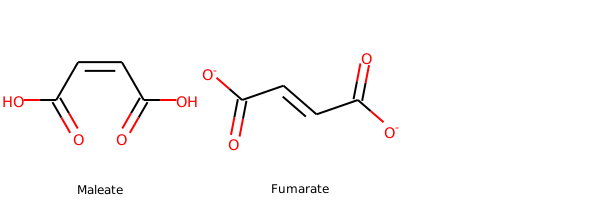

In [60]:
smiles_list = []
n_list = []
for m in rs.components:
    print(m.name, m.mid_diam, m.logP, m.role, m.Synth_score, m.complexity, m.pkl)
    print(m.name, m.DB)
    n_list.append(m.name)
    smiles_list.append(m.SMILES)
    MOL = Chem.MolFromSmiles(m.SMILES)
#     Draw.MolToFile(MOL, fileName=m.name+'.svg')
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

In [49]:
def get_SynthA_score(mol):
    """Get synthetic accesibility score from RDKIT contrib (SA_score).

    """
    from ercollect.SA_score import sa_scores
    s = sa_scores.calculateScore(mol)
    return s

In [54]:
smiles_list

['O=C(O)/C=C\\C(=O)O',
 'O=C([O-])/C=C/C(=O)[O-]',
 'O=C([O-])/C=C\\C(=O)[O-]',
 'O=C(O)/C=C/C(=O)O']

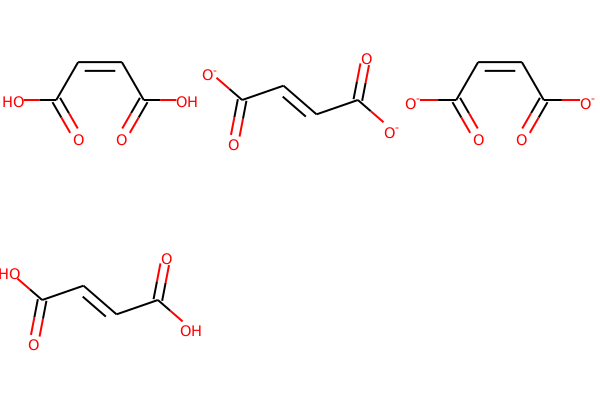

In [56]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list)

In [59]:
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    print(get_SynthA_score(mol))
    print(Descriptors.MolLogP(mol))

2.11064679185338
-0.28819999999999985
4.635769868776459
-2.9576000000000002
4.635769868776459
-2.9576000000000002
2.11064679185338
-0.28819999999999985


## Analyse all RS for a certain skip_reaction reason

In [ ]:
import os

In [ ]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [ ]:
count = 0
count_total = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    count_total += 1
    if rs.skip_rxn is True:
        if rs.skip_reason == 'one component has no SMILES':
            count += 1
            print(rs.pkl)
            os.system('rm '+rs_dir+rs.pkl)

In [ ]:
print(count, count_total, count/count_total * 100)

## Analyse the number of times each skip_reason is used

In [ ]:
reasons = {'one component failed resolution': 0, 'SABIO E-ID is for mutant': 0, 
           'SABIO R-ID not found': 0,  'DNA present - SABIO has a bug': 0,
           'CHEBI ID of a component not available': 0, 'a component is in skip_names': 0,
           'one component is ?': 0, 'No result for KEGG URL search - likely outdated': 0,
           'CHEBI ID not available for one component': 0,
           'one component has invalid SMILES': 0, 'one component has no SMILES': 0, 
           'one component has wildcard SMILES': 0,
           'one component has no molecule - rxn is incomplete or generic': 0,
           'one component could not have diameter calculated': 0}

In [ ]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [ ]:
count_total = 0
count_skipped = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    if 'KEGG' not in rs.pkl:
        continue
    count_total += 1
    if rs.skip_rxn is True:
        count_skipped += 1
        reasons[rs.skip_reason] += 1
#         if rs.skip_reason == 'CHEBI ID not available for one component':
#             print(rs.__dict__)
#             input()

In [ ]:
print(count_skipped, count_total, count_skipped/count_total * 100)

In [ ]:
reasons

## Analyse RS with max_comp_size < some threshold
- using threshold 4.2 angstrom 10/12/18

In [5]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw

In [6]:
RS_des = ['sRS-1_11_1_21-KEGG-R00009.gpkl', 'sRS-1_11_1_21-KEGG-R00602.gpkl',
          'sRS-1_11_1_8-KEGG-R02810.gpkl', 'sRS-1_13_11_49-KEGG-R05721.gpkl',
          'sRS-1_15_1_1-KEGG-R00275.gpkl', 'sRS-1_16_3_1-KEGG-R00078.gpkl',
          'sRS-1_1_3_13-KEGG-R00608.gpkl', 'sRS-1_2_2_4-KEGG-R00276.gpkl',
          'sRS-1_2_98_1-KEGG-R00614.gpkl', 'sRS-1_4_3_21-KEGG-R06154.gpkl',
          'sRS-1_7_1_14-KEGG-R09809.gpkl', 'sRS-1_7_3_6-KEGG-R10230.gpkl',
          'sRS-1_8_3_4-KEGG-R01851.gpkl', 'sRS-3_13_1_5-KEGG-R10534.gpkl',
          'sRS-3_13_1_5-KEGG-R10535.gpkl', 'sRS-3_13_1_5-KEGG-R10538.gpkl',
          'sRS-3_5_1_49-KEGG-R00524.gpkl', 'sRS-3_5_5_8-KEGG-R05780.gpkl',
          'sRS-3_5_5_XX-KEGG-R00152.gpkl', 'sRS-4_2_1_112-KEGG-R05380.gpkl',
          'sRS-4_2_1_66-KEGG-R01408.gpkl', 'sRS-4_99_1_2-KEGG-R09339.gpkl',
          'sRS-XX_XX_XX_XX-KEGG-R00793.gpkl', 'sRS-XX_XX_XX_XX-KEGG-R09094.gpkl',
          'sRS-XX_XX_XX_XX-KEGG-R09996.gpkl']

In [14]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [34]:
count = 0
for pkl in RS_des:
    print(pkl)
    rs = get_RS(directory+pkl, output_dir=directory, verbose=True)
    smiles_list = []
    n_list = []
#     for m in rs.components:
#         print(m.name, m.mid_diam)
    print('---------------------------------------------')
    count += 1
print(count)

sRS-1_11_1_21-KEGG-R00009.gpkl
loading: sRS-1_11_1_21-KEGG-R00009.gpkl
---------------------------------------------
sRS-1_11_1_21-KEGG-R00602.gpkl
loading: sRS-1_11_1_21-KEGG-R00602.gpkl
---------------------------------------------
sRS-1_11_1_8-KEGG-R02810.gpkl
loading: sRS-1_11_1_8-KEGG-R02810.gpkl
---------------------------------------------
sRS-1_13_11_49-KEGG-R05721.gpkl
loading: sRS-1_13_11_49-KEGG-R05721.gpkl
---------------------------------------------
sRS-1_15_1_1-KEGG-R00275.gpkl
loading: sRS-1_15_1_1-KEGG-R00275.gpkl
---------------------------------------------
sRS-1_16_3_1-KEGG-R00078.gpkl
loading: sRS-1_16_3_1-KEGG-R00078.gpkl
---------------------------------------------
sRS-1_1_3_13-KEGG-R00608.gpkl
loading: sRS-1_1_3_13-KEGG-R00608.gpkl
---------------------------------------------
sRS-1_2_2_4-KEGG-R00276.gpkl
loading: sRS-1_2_2_4-KEGG-R00276.gpkl
---------------------------------------------
sRS-1_2_98_1-KEGG-R00614.gpkl
loading: sRS-1_2_98_1-KEGG-R00614.gpkl
-----

##  Modify some attribute of all RS

In [37]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [38]:
rs.__dict__

{'DB': 'KEGG',
 'DB_ID': 'R09996',
 'EC': '-.-.-.-',
 'UniprotID': None,
 'all_fit': True,
 'components': [<ercollect.molecule.molecule at 0x7fd4c2a82550>,
 'delta_comp': 6.0,
 'delta_sa': 0.16509230769230676,
 'max_XlogP': 0.2,
 'max_comp_size': 3.107,
 'max_logP': 0.067,
 'min_XlogP': -1.1,
 'min_logP': -0.44710000000000005,
 'mol_collected': True,
 'p_max_comp': 8.0,
 'p_max_sa': 4.107167918949392,
 'pkl': 'sRS-XX_XX_XX_XX-KEGG-R09996.gpkl',
 'r_max_comp': 2.0,
 'r_max_sa': 3.942075611257085,
 'req_mod': None,
 'seed_MOF': None,
 'skip_reason': None,
 'skip_rxn': False}

In [39]:
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    rs.mol_collected = False
    rs.max_logP = None
    rs.max_XlogP = None
    rs.max_logS = None
    rs.min_logP = None
    rs.min_XlogP = None
    rs.min_logS = None
    rs.save_object(rs_dir+rs.pkl)